In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

%matplotlib inline

In [2]:
filepath='US_O365Home_PDP_Order_NoOrder_CSV.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

,MC1ID,Paid Order Exists,Try Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Site (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,426f436add9d4b8c9e99efdc66b404fc,1,0,4,0,1,0,0,3,968.500000,774.800000,172,0,4,0,0,2,0
1,d99b8f5e9aea44e093f9e5a215d4af52,1,0,3,0,1,0,1,2,1131.333333,1131.333333,145,0,0,0,0,0,0
2,aadab6791a1249ad98ed26f2b1c3178a,1,0,2,1,0,0,1,1,717.000000,478.000000,61,0,0,0,0,0,0
3,8ca21e399425468387c4ab4fcc7d6402,1,0,2,1,0,0,1,0,513.500000,513.500000,63,0,0,0,0,1,0
4,3e8af28fa7f3417bb7d08c4cd5870656,1,0,2,1,0,0,1,0,38.000000,15.200000,6,0,0,0,0,0,0


In [4]:
df['Paid Order Exists'].value_counts()

0    1596
1     183
Name: Paid Order Exists, dtype: int64

In [5]:
df['Try Exists'].value_counts()

0    1729
1      50
Name: Try Exists, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 18 columns):
MC1ID                                   1779 non-null object
Paid Order Exists                       1779 non-null int64
Try Exists                              1779 non-null int64
Total Visits                            1779 non-null int64
New Visitors                            1779 non-null int64
Return Visitors                         1779 non-null int64
Enter PDP from Office.com               1779 non-null int64
Enter PDP from Store                    1779 non-null int64
Enter PDP from O365 Web                 1779 non-null int64
Time Spent per Visit (seconds)          1582 non-null float64
Average Time Spent on Site (seconds)    1582 non-null float64
Link Clicks (e4)                        1779 non-null int64
Link Clicks on OverviewTab              1779 non-null int64
Link Clicks on TechSpecsTab             1779 non-null int64
Link Clicks on ReviewTab                1779 non

In [7]:
df.describe()

,Paid Order Exists,Try Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Site (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1582.000000,1582.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,0.102867,0.028106,1.132659,0.519955,0.480045,0.062957,0.320967,0.411467,475.342801,351.201511,22.560427,0.010118,0.041034,0.017426,0.017426,0.227094,0.170320
std,0.303870,0.165321,0.486426,0.499742,0.499742,0.256467,0.521597,0.544327,859.000278,785.467920,43.084832,0.120502,0.325176,0.168464,0.178198,1.408686,1.255672
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,165.000000,70.384615,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,571.500000,325.750000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,1.000000,1.000000,3.000000,4.000000,5.000000,11193.000000,11193.000000,950.000000,2.000000,8.000000,4.000000,4.000000,48.000000,22.000000


In [8]:
# there are two entries for few MC1IDs - pull data again
# df.groupby(['MC1ID']).count()['Order Exists'] 

In [9]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Total Visits',
       'New Visitors', 'Return Visitors', 'Enter PDP from Office.com',
       'Enter PDP from Store', 'Enter PDP from O365 Web',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Site (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

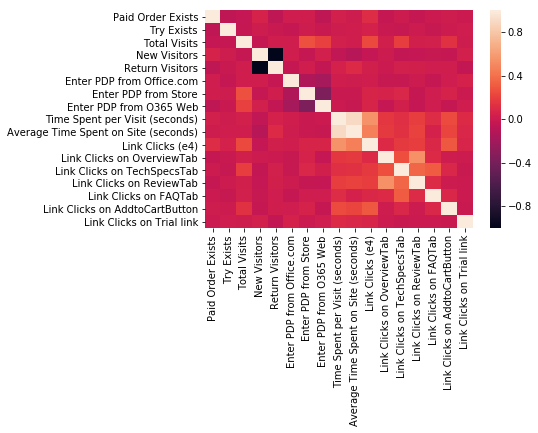

In [10]:
sns.heatmap(df.corr())

In [11]:
df_prep1 = df.drop(['MC1ID'], axis =1)
cols_standard = df_prep1.columns
df_prep1.head()

,Paid Order Exists,Try Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Site (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,1,0,4,0,1,0,0,3,968.500000,774.800000,172,0,4,0,0,2,0
1,1,0,3,0,1,0,1,2,1131.333333,1131.333333,145,0,0,0,0,0,0
2,1,0,2,1,0,0,1,1,717.000000,478.000000,61,0,0,0,0,0,0
3,1,0,2,1,0,0,1,0,513.500000,513.500000,63,0,0,0,0,1,0
4,1,0,2,1,0,0,1,0,38.000000,15.200000,6,0,0,0,0,0,0


In [12]:
ss = StandardScaler()
df_prep2 = ss.fit_transform(df_prep1)

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
d =df_prep2.tolist()


In [14]:
df_standard =  pd.DataFrame(data= d, columns=cols_standard)
df_standard.head()

,Paid Order Exists,Try Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Site (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,2.953187,-0.170054,5.896373,-1.040739,1.040739,-0.245546,-0.615528,4.756815,0.574288,0.539465,3.469471,-0.083989,12.178270,-0.103467,-0.097815,1.258907,-0.135679
1,2.953187,-0.170054,3.839983,-1.040739,1.040739,-0.245546,1.302202,2.919166,0.763909,0.993521,2.842625,-0.083989,-0.126227,-0.103467,-0.097815,-0.161255,-0.135679
2,2.953187,-0.170054,1.783592,0.960855,-0.960855,-0.245546,1.302202,1.081517,0.281413,0.161482,0.892434,-0.083989,-0.126227,-0.103467,-0.097815,-0.161255,-0.135679
3,2.953187,-0.170054,1.783592,0.960855,-0.960855,-0.245546,1.302202,-0.756132,0.044435,0.206692,0.938867,-0.083989,-0.126227,-0.103467,-0.097815,0.548826,-0.135679
4,2.953187,-0.170054,1.783592,0.960855,-0.960855,-0.245546,1.302202,-0.756132,-0.509291,-0.427908,-0.384476,-0.083989,-0.126227,-0.103467,-0.097815,-0.161255,-0.135679


In [15]:
df_standard.isnull().sum()

Paid Order Exists                         0
Try Exists                                0
Total Visits                              0
New Visitors                              0
Return Visitors                           0
Enter PDP from Office.com                 0
Enter PDP from Store                      0
Enter PDP from O365 Web                   0
Time Spent per Visit (seconds)          197
Average Time Spent on Site (seconds)    197
Link Clicks (e4)                          0
Link Clicks on OverviewTab                0
Link Clicks on TechSpecsTab               0
Link Clicks on ReviewTab                  0
Link Clicks on FAQTab                     0
Link Clicks on AddtoCartButton            0
Link Clicks on Trial link                 0
dtype: int64

In [16]:
df_standard.fillna(value=0,inplace=True)
df_standard.isnull().sum()

Paid Order Exists                       0
Try Exists                              0
Total Visits                            0
New Visitors                            0
Return Visitors                         0
Enter PDP from Office.com               0
Enter PDP from Store                    0
Enter PDP from O365 Web                 0
Time Spent per Visit (seconds)          0
Average Time Spent on Site (seconds)    0
Link Clicks (e4)                        0
Link Clicks on OverviewTab              0
Link Clicks on TechSpecsTab             0
Link Clicks on ReviewTab                0
Link Clicks on FAQTab                   0
Link Clicks on AddtoCartButton          0
Link Clicks on Trial link               0
dtype: int64

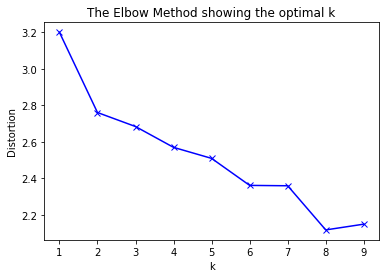

In [17]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,10)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_standard)
    distortions.append(sum(np.min(cdist(df_standard, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_standard.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
distortions

[3.199153810719937,
 2.7603767867154154,
 2.683705345829201,
 2.569862781778506,
 2.5096151646720855,
 2.3620145158578216,
 2.3599416152382595,
 2.1186129286802196,
 2.150125037629685]

In [19]:
df_standard.drop(['kmeans'], axis=1, inplace=True)

KeyError: "['kmeans'] not found in axis"

In [ ]:
#K means Clustering 
def doKmeans(X, nclust=7):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

#k=7
clust_labels, cent = doKmeans(df_standard, 7)
kmeans = pd.DataFrame(clust_labels)
df_standard.insert((df_standard.shape[1]),'kmeans',kmeans)

In [ ]:
df_standard.head()

In [ ]:
d = ss.inverse_transform(df_prep2)
d

In [ ]:
df['kmeans'] = df_standard['kmeans']
df.head()

In [ ]:
df.kmeans.value_counts()

In [ ]:
K


In [ ]:
df_result = df[df['kmeans']==0].describe()[1:2]
for k in range(1,7):
    df_k = df[df['kmeans']==k].describe()[1:2]
    #print (df_k1)
    df_result = df_result.append(df_k, ignore_index = True)

df_result


In [ ]:
df_result.to_csv("Clustering_result.csv")

In [ ]:
#Plot the clusters obtained using k means`
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_standard['Try Exists'],df_standard['Enter PDP from Store'],
                     c=df_standard['kmeans'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Return Visitors')
ax.set_ylabel('Link Clicks')
plt.colorbar(scatter)

## --- END --- 

In [83]:
#K means Clustering 
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_standard, 4)
kmeans_4 = pd.DataFrame(clust_labels)
df_standard.insert((df_prep.shape[1]),'kmeans_4',kmeans_4)

In [84]:
df_standard.head()

,Order Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Site (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,kmeans_4,kmeans_3,kmeans
0,1.000417,-0.230369,1.05002,-1.050898,-0.263745,1.085242,-0.165693,1.117009,-0.395243,0.186999,-0.040867,-0.084647,-0.075407,-0.082454,0.878722,1,0,1
1,1.000417,-0.230369,1.05002,-1.050898,-0.263745,1.085242,-0.165693,1.115056,1.512623,-0.407602,-0.040867,-0.084647,-0.075407,-0.082454,-0.206785,1,0,1
2,1.000417,-0.230369,1.05002,-1.050898,-0.263745,1.085242,-0.165693,1.089669,-0.604858,1.563969,-0.040867,-0.084647,-0.075407,-0.082454,-0.206785,1,0,1
3,1.000417,-0.230369,1.05002,-1.050898,-0.263745,1.085242,-0.165693,1.062329,-0.456233,2.283749,-0.040867,-0.084647,-0.075407,-0.082454,-0.206785,1,0,1
4,1.000417,-0.230369,1.05002,-1.050898,-0.263745,1.085242,-0.165693,1.060377,1.448483,-0.470191,-0.040867,-0.084647,-0.075407,-0.082454,-0.206785,1,0,1


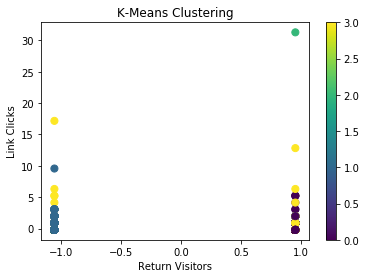

In [85]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_standard['Return Visitors'],df_standard['Link Clicks on AddtoCartButton'],
                     c=kmeans_4[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Return Visitors')
ax.set_ylabel('Link Clicks')
plt.colorbar(scatter)

In [24]:
df_prep = df.drop(['MC1ID','Time Spent per Visit (seconds)',
       'Average Time Spent on Site (seconds)', 'Link Clicks (e4)'], axis=1)
df_prep.head()

,Order Exists,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton
0,1,1,1,0,0,1,0,0,0,0,0,1
1,1,1,1,0,0,1,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,0,0
4,1,1,1,0,0,1,0,0,0,0,0,0


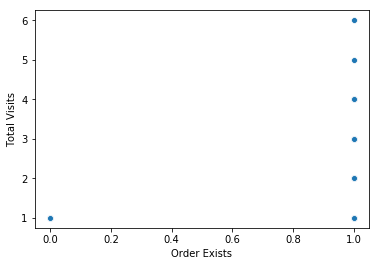

In [28]:
sns.scatterplot(df_prep['Order Exists'], df_prep['Total Visits'] )